<a href="https://colab.research.google.com/github/omarbrandan/DataScienceI/blob/main/ProyectoDS_ParteI_Brand%C3%A1n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/'

Mounted at /content/gdrive
/content/gdrive/MyDrive


In [ ]:
df_songs = pd.read_csv('/content/gdrive/MyDrive/DataScience/PROYECTO_FINAL/Most Streamed Spotify Songs 2024.csv', encoding='latin-1')

In [ ]:
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [ ]:
pd.to_datetime(df_songs['Release Date'])

0      2024-04-26
1      2024-05-04
2      2024-03-19
3      2023-01-12
4      2024-05-31
          ...    
4595   2017-09-05
4596   2018-07-27
4597   2020-02-28
4598   2016-11-08
4599   2017-04-11
Name: Release Date, Length: 4600, dtype: datetime64[ns]

In [ ]:
df_songs.index = df_songs['All Time Rank']
df_songs = df_songs.drop('All Time Rank', axis='columns')

In [ ]:
df_songs.head()

,Track,Album Name,Artist,Release Date,ISRC,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
All Time Rank,,,,,,,,,,,,,,,,,,,,,
1,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,725.4,"390,470,936","30,716","196,631,588",92.0,...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
2,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,545.9,"323,703,884","28,113","174,597,137",92.0,...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
3,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,538.4,"601,309,283","54,331","211,607,669",92.0,...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
4,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,444.9,"2,031,280,633","269,802","136,569,078",85.0,...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
5,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,423.3,"107,034,922","7,223","151,469,874",88.0,...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [ ]:
top_8_artists = df_songs['Artist'].value_counts().head(8)
top_8_artists

Artist
Drake            63
Taylor Swift     63
Bad Bunny        60
KAROL G          32
The Weeknd       31
Travis Scott     30
Billie Eilish    27
Ariana Grande    26
Name: count, dtype: int64

Text(0.5, 0, 'Artista')

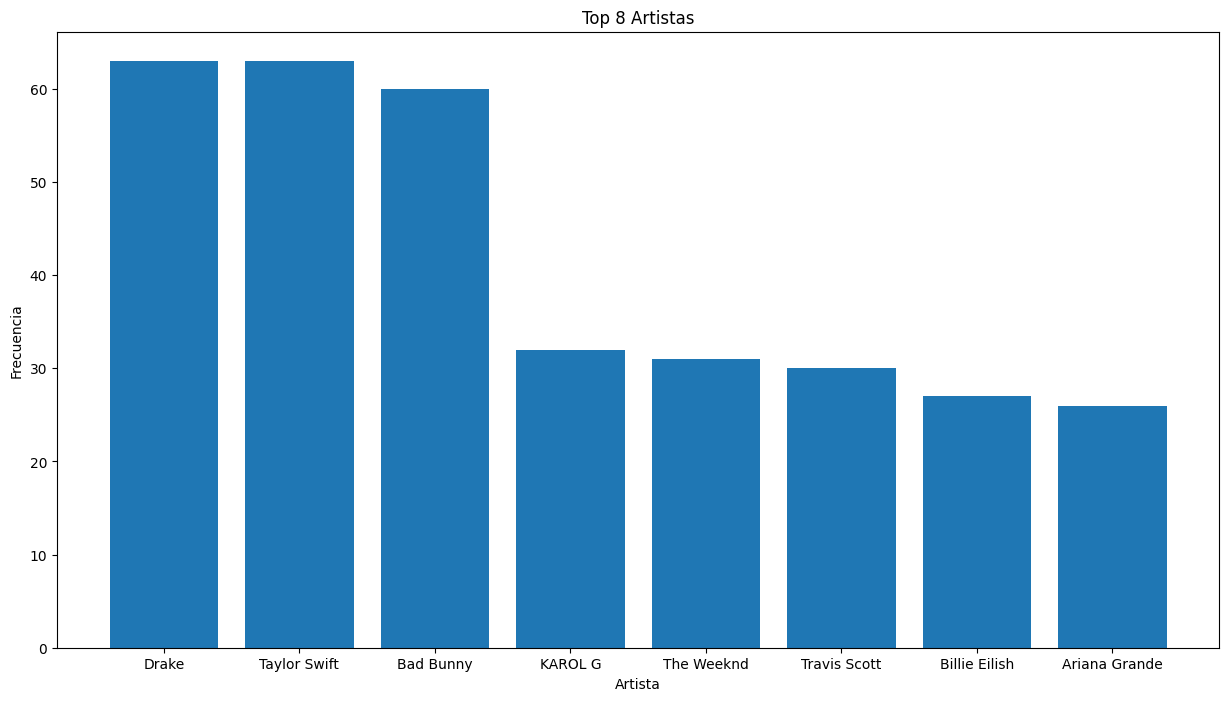

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(top_8_artists.index, top_8_artists)
ax.set_title('Top 8 Artistas')
ax.set_ylabel('Frecuencia')
ax.set_xlabel('Artista')

In [ ]:
from bokeh.palettes import Spectral6
from bokeh.models import HoverTool
from bokeh.io import show, output_notebook
output_notebook()
from bokeh.embed import file_html
from bokeh.models import CategoricalColorMapper, ColumnDataSource, FactorRange
from bokeh.plotting import figure, output_file

In [ ]:
# Calcular el top 8 de artistas con sus counts
top_8_artists_df = df_songs['Artist'].value_counts().head(8).reset_index()
top_8_artists_df.columns = ['Artist', 'count']

# Generar una lista de colores con la misma longitud que el df
num_colors = len(top_8_artists_df)
from bokeh.palettes import viridis  # importar viridis para un rango más amplio de colores
colors = viridis(num_colors)

# Agregar una columna de color al df
top_8_artists_df['color'] = colors

# Create a ColumnDataSource from the top 10 artists DataFrame
top_8_artists = ColumnDataSource(data=top_8_artists_df)

# Create the figure, passing the unique artist names as x_range
p = figure(x_range=top_8_artists_df['Artist'].tolist(), height=300, title="Top 8 Artistas")

# Create a CategoricalColorMapper
color_mapper = CategoricalColorMapper(factors=top_8_artists_df['Artist'].tolist(), palette=Spectral6)

# Create the vbar glyph, using the color mapper
vbar = p.vbar(x='Artist', top='count', width=0.7,
             fill_color={'field': 'Artist', 'transform': color_mapper},
             source=top_8_artists, legend_label="Artist")

p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Artista"
p.yaxis.axis_label = "Canciones Top"
p.legend.orientation = "horizontal"
p.legend.location = "top_center"
p.add_tools(HoverTool())

# Try saving to a different location with a more explicit path
try:
    output_file("./my_bokeh_plot.html")  # Save in the current directory
    show(p)
    print("Plot saved to ./my_bokeh_plot.html")
except Exception as e:
    print(f"Error saving plot: {e}")

Plot saved to ./my_bokeh_plot.html


In [ ]:
# Replace commas and handle missing values before converting to integer
df_songs['Spotify Streams'] = df_songs['Spotify Streams'].replace(',', '', regex=True).fillna(0).astype(int)
df_songs['YouTube Views'] = df_songs['YouTube Views'].astype(str).str.replace(',', '').replace('nan', '0').astype(int) # Convert to string, replace commas, replace 'nan', then convert to int
df_songs['TikTok Views'] = df_songs['TikTok Views'].astype(str).str.replace(',', '').replace('nan', '0').astype(int) # Convert to string, replace commas, replace 'nan', then convert to int

In [ ]:
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4600 entries, 1 to 4,593
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   Track Score                 4600 non-null   float64
 6   Spotify Streams             4600 non-null   int64  
 7   Spotify Playlist Count      4530 non-null   object 
 8   Spotify Playlist Reach      4528 non-null   object 
 9   Spotify Popularity          3796 non-null   float64
 10  YouTube Views               4600 non-null   int64  
 11  YouTube Likes               4285 non-null   object 
 12  TikTok Posts                3427 non-null   object 
 13  TikTok Likes                3620 non-

In [ ]:
# Check for duplicates in 'Spotify Streams' and 'YouTube Views'
print(df_songs['Spotify Streams'].duplicated().sum())
print(df_songs['YouTube Views'].duplicated().sum())

174
309


In [ ]:
df_songs['Spotify_MM_Streams'] = round(df_songs['Spotify Streams'] / 1000000.0, 2)
df_songs['YouTube_MM_Views'] = round(df_songs['YouTube Views'] / 1000000.0, 2)
df_songs['TikTok_MM_Views'] = round(df_songs['TikTok Views'] / 1000000.0, 2)  # Convert to millions
df_songs.head()

,Track,Album Name,Artist,Release Date,ISRC,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,...,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,Spotify_MM_Streams,YouTube_MM_Views,TikTok_MM_Views
All Time Rank,,,,,,,,,,,,,,,,,,,,,
1,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,725.4,390470936,"30,716","196,631,588",92.0,...,114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0,390.47,84.27,5332.28
2,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,545.9,323703884,"28,113","174,597,137",92.0,...,111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1,323.70,116.35,208.34
3,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,538.4,601309283,"54,331","211,607,669",92.0,...,172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0,601.31,122.60,3369.12
4,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,444.9,2031280633,"269,802","136,569,078",85.0,...,210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0,2031.28,1096.10,14603.73
5,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,423.3,107034922,"7,223","151,469,874",88.0,...,105.0,"4,493,884","7,006","207,179","457,017",NaN,1,107.03,77.37,0.00


In [ ]:
top_streams_df = df_songs.sort_values('Spotify_MM_Streams', ascending=False)

# Sort the DataFrame by 'Spotify_MM_Streams' in descending order
top_10_streams_df_sorted = top_streams_df.sort_values('Spotify_MM_Streams', ascending=False)

# Drop duplicates based on 'Track', keeping the first occurrence (which has the highest 'Spotify_MM_Streams')
top_10_streams_df_unique = top_10_streams_df_sorted.drop_duplicates(subset='Track', keep='first')

top_10_streams_df_unique = top_10_streams_df_unique.head(10)

top_10_streams_df_unique = top_10_streams_df_unique.set_index('Release Date')

top_10_streams_df_unique = top_10_streams_df_unique[['Track', 'Album Name', 'Artist', 'Spotify_MM_Streams', 'YouTube_MM_Views', 'TikTok_MM_Views']]

top_10_streams_df_unique

,Track,Album Name,Artist,Spotify_MM_Streams,YouTube_MM_Views,TikTok_MM_Views
Release Date,,,,,,
11/29/2019,Blinding Lights,Blinding Lights,The Weeknd,4281.47,833.81,3501.18
1/6/2017,Shape of You,Shape of You,Ed Sheeran,3909.46,8014.00,2320.86
11/8/2018,Someone You Loved,Breach,Lewis Capaldi,3427.50,2153.70,2161.03
10/18/2018,Sunflower - Spider-Man: Into the Spider-Verse,Sunflower (Spider-Man: Into the Spider-Verse),Post Malone,3358.70,2763.19,1597.45
3/31/2022,As It Was,As It Was,Harry Styles,3301.81,800.90,15405.88
9/22/2016,Starboy,Starboy,The Weeknd,3291.26,2829.99,375.50
4/4/2016,One Dance,One Dance (feat. Wizkid & Kyla) - Single,Drake,3192.20,456.81,388.54
7/9/2021,STAY (with Justin Bieber),Stay,The Kid LAROI,3107.10,0.00,0.00
5/10/2019,Dance Monkey,Dance Monkey,Tones And I,3071.21,3366.45,5861.94


In [ ]:
# Import the necessary libraries
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
import os

# Reset the index to bring back the 'Artist' column
top_10_streams_df_unique = top_10_streams_df_unique.reset_index()

# Now you can set 'Artist' as the index
top_10_streams_df_unique = top_10_streams_df_unique.set_index('Artist')

source = ColumnDataSource(data=dict(
    x=top_10_streams_df_unique['Spotify_MM_Streams'],
    y=top_10_streams_df_unique['YouTube_MM_Views'],
    artist=top_10_streams_df_unique.index
))

# Create a new figure object for display in the notebook

p = figure(width=700, height=300,
           x_axis_label='Streams en Spotify',
           y_axis_label='Vistas en YouTube',
           title='Dispersión Spotify vs. YouTube')

p.circle(x='x', y='y', source=source, size=5,
         line_color='navy', fill_color='orange', fill_alpha=0.5)

# Create a new HoverTool instance for each plot
hover = HoverTool()
hover.tooltips = [
    ("Artista", "@artist"),
    ("Spotify Streams", "@x"),
    ("YouTube Views", "@y")
]

# Add the HoverTool to the figure
p.add_tools(hover)

# Show the plot
show(p)

In [ ]:
# Drop duplicates based on 'Track', keeping the first occurrence (which has the highest 'Spotify_MM_Streams')
top_streams_per_year = top_streams_df.drop_duplicates(subset='Track', keep='first')
top_streams_per_year['Release Date'] = pd.to_datetime(top_streams_per_year['Release Date'])

# Filter for years since 2000 and exclude 2024
top_streams_per_year = top_streams_per_year[
    (top_streams_per_year['Release Date'].dt.year >= 2000) &
    (top_streams_per_year['Release Date'].dt.year != 2024)
]

top_streams_per_year = top_streams_per_year.sort_values(by=['Release Date'])
top_streams_per_year['Release Date'] = top_streams_per_year['Release Date'].dt.year
top_streams_per_year = top_streams_per_year.groupby('Release Date').sum()


# Reset the index to make 'Release Date' a column again
top_streams_per_year = top_streams_per_year.reset_index()

top_streams_per_year = top_streams_per_year[['Release Date','Spotify_MM_Streams', 'YouTube_MM_Views', 'TikTok_MM_Views']]

top_streams_per_year['Spotify_MM_Streams'] = top_streams_per_year['Spotify_MM_Streams'].astype(int)
top_streams_per_year['YouTube_MM_Views'] = top_streams_per_year['YouTube_MM_Views'].astype(int)
top_streams_per_year['TikTok_MM_Views'] = top_streams_per_year['TikTok_MM_Views'].astype(int)

top_streams_per_year

<ipython-input-19-7dfba81aa443>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_streams_per_year['Release Date'] = pd.to_datetime(top_streams_per_year['Release Date'])


,Release Date,Spotify_MM_Streams,YouTube_MM_Views,TikTok_MM_Views
0,2000,1798,961,771
1,2001,399,1632,167
2,2002,6917,6328,924
3,2003,4508,4170,2791
4,2004,5191,4598,2090
5,2005,6111,5524,222395
6,2006,3288,2772,2633
7,2007,5216,7051,4439
8,2008,12871,6729,10235
9,2009,16186,17626,9018


In [ ]:
#Lineplots
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, DatetimeTickFormatter, Legend, LegendItem, NumeralTickFormatter
import pandas as pd
import os

line_plot = figure(width=600, height=500, title='Reproducciones entre años 2000 y 2024',
                   x_axis_label='Fecha', y_axis_label='Reproducciones')

# Format the y-axis to display integers without decimals
line_plot.yaxis.formatter = NumeralTickFormatter(format="0,0")

# Create renderers for each line
r1 = line_plot.line(top_streams_per_year['Release Date'], top_streams_per_year['Spotify_MM_Streams'], line_width=2, color='green')
r2 = line_plot.line(top_streams_per_year['Release Date'], top_streams_per_year['YouTube_MM_Views'], line_width=2,color='red')
#r3 = line_plot.line(top_streams_per_year['Release Date'], top_streams_per_year['TikTok_MM_Views'], line_width=2,color='black')

# Create a legend and add it to the figure
legend = Legend(items=[
    LegendItem(label="Spotify", renderers=[r1]),
    LegendItem(label="YouTube", renderers=[r2]),
    #LegendItem(label="TikTok", renderers=[r3])
])
line_plot.add_layout(legend, 'left')

line_plot.add_tools(HoverTool())
show(line_plot)

In [ ]:
top_streams_per_year[['Spotify_MM_Streams', 'YouTube_MM_Views', 'TikTok_MM_Views']].describe().astype(int).applymap('{:,}'.format)

,Spotify_MM_Streams,YouTube_MM_Views,TikTok_MM_Views
count,24,24,24
mean,"74,695","67,835","163,979"
std,"76,342","66,210","220,586"
min,399,961,167
25%,"5,887","6,127","4,027"
50%,"51,786","50,529","60,229"
75%,"168,093","130,313","261,862"
max,"193,412","198,087","787,701"


In [ ]:
df_songs[['Spotify_MM_Streams']].describe().astype(int).applymap('{:,}'.format)

,Spotify_MM_Streams
count,"4,600"
mean,436
std,536
min,0
25%,63
50%,226
75%,611
max,"4,281"


In [ ]:
df_songs[['Spotify_MM_Streams', 'Explicit Track']]

,Spotify_MM_Streams,Explicit Track
All Time Rank,,
1,390.47,0
2,323.70,1
3,601.31,0
4,2031.28,0
5,107.03,1
...,...,...
"4,585",305.05,1
"4,575",52.28,0
"4,571",189.97,1


In [ ]:
df_songs['Explicit Track'].value_counts()

Explicit Track
0    2949
1    1651
Name: count, dtype: int64

In [ ]:
df_songs[df_songs['Explicit Track'] == 0]['Spotify_MM_Streams'].mean()

432.74400474737195

In [ ]:
df_songs[df_songs['Explicit Track'] == 1]['Spotify_MM_Streams'].mean()

442.9222047244095

In [ ]:
! pip install pingouin
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels
from scipy import stats
from pingouin import pairwise_ttests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 4.0 MB/s eta 0:00:00


#¿QUÉ ES EL NIVEL DE SIGNIFICANCIA (ALFA)?

El nivel de significancia, también denotado como alfa o α, es la probabilidad de rechazar la hipótesis nula cuando es verdadera. Por ejemplo, un nivel de significancia de 0.05 indica un riesgo de 5% de concluir que existe una diferencia cuando en realidad no hay ninguna diferencia.


#¿QUÉ SON LOS VALORES P?
Los valores p son la probabilidad de obtener un efecto por lo menos tan extremo como el de los datos de la muestra, asumiendo que la hipótesis nula es verdadera.

Para graficar el valor p, debemos determinar la distancia entre la media de la muestra y el valor de la hipótesis nula.

Probabilidad en favor de la H0.

#¿QUÉ ES EL VALOR T?
 El valor t mide el tamaño de la diferencia en relación con la variación en los datos de la muestra. Dicho de otro modo, T es simplemente la diferencia calculada representada en unidades de error estándar. Cuanto mayor sea la magnitud de T, mayor será la evidencia en contra de la hipótesis nula. Esto significa que hay mayor evidencia de que existe una diferencia significativa. Cuanto más cerca esté T del 0, más probable será que no exista una diferencia significativa.





#RECHAZO HIPÓTESIS NULA

Cuando un valor p es menor que o igual al nivel de significancia, se rechaza la hipótesis nula. Por ejemplo: el valor p de 0.03112 es estadísticamente significativo a un nivel de significancia de 0.05, pero no al nivel 0.01.

Si el estadístico t calculado queda fuera del rango definido por los valores críticos positivos y negativos, rechazaría la hipótesis nula.

Cuanto mayor sea el valor absoluto del valor t, menor será el valor p, y mayor será la evidencia en contra de la hipótesis nula.

In [ ]:
#¿Son las reproducciones de las canciones en Spotify con contenido explícito (1) significativamente diferentes de las que no tienen este contenido (0)?

#μ1 = μ de reproducciones en Spotify de canciones con contenido explícito
#μ2 = μ de reproducciones en Spotify de canciones sin contenido explícito

#H0: μ1 = μ2
#H1: μ1 ≠ μ2

In [ ]:
explicit=df_songs[df_songs['Explicit Track']==1].Spotify_MM_Streams
no_explicit=df_songs[df_songs['Explicit Track']==0].Spotify_MM_Streams

statistic, pvalue = stats.ttest_ind(explicit,no_explicit, equal_var=False)
print('t-statistic:',round(statistic,2),'- p-value:', round(pvalue,2))

t-statistic: 0.64 - p-value: 0.52


In [ ]:
#t-statistic = 0.64, no hay diferencia significativa.

In [ ]:
#p-value > alfa: no se rechaza la hipótesis nula.
#0.52 > 0.05

In [ ]:
from scipy.stats import t
m = df_songs.Spotify_MM_Streams.mean()
s = df_songs.Spotify_MM_Streams.std()
dof = len(df_songs.Spotify_MM_Streams)-1
confianza = 0.95 # Nivel de confianza; Nivel de significancia = 0.05
t_crit = np.abs(t.ppf((1-confianza)/2,dof)) # Valor critico
print('critical value:', round(t_crit,2))
print('Intervalo de confianza:')
(m-s*t_crit/np.sqrt(len(df_songs.Spotify_MM_Streams))), (m+s*t_crit/np.sqrt(len(df_songs.Spotify_MM_Streams))) # Intervalo

critical value: 1.96
Intervalo de confianza:


(420.8955672529642, 451.8986197035575)

Rango dentro del cual puede tener un 95% de confianza en que se encuentra la verdadera media poblacional de transmisiones de Spotify (en millones).

In [ ]:
explicit.mean(),no_explicit.mean()

(442.9222047244095, 432.74400474737195)

In [ ]:
import numpy as np, statsmodels.stats.api as sms
X1, X2 = df_songs[df_songs['Explicit Track']==1].Spotify_MM_Streams,df_songs[df_songs['Explicit Track']==0].Spotify_MM_Streams
cm = sms.CompareMeans(sms.DescrStatsW(X1), sms.DescrStatsW(X2)) # Comparación de medias
print(cm.tconfint_diff(usevar='unequal')) #usevar='unequal' = asume varianzas desiguales

(-21.08925658551978, 41.44565653959474)


No existe una diferencia estadísticamente significativa en el número promedio de transmisiones de Spotify entre canciones explícitas y no explícitas.

Aunque puede haber alguna diferencia en las transmisiones promedio observadas entre los dos tipos de canciones en su muestra, esta diferencia no es lo suficientemente grande como para concluir con seguridad que existe una diferencia real en la población general de canciones.

No se rechaza la hipótesis nula.

----------------------------------------------------------------------------

#OUTLIERS

In [ ]:
df_songs[['Release Date', 'Spotify_MM_Streams']]

,Release Date,Spotify_MM_Streams
All Time Rank,,
1,4/26/2024,390.47
2,5/4/2024,323.70
3,3/19/2024,601.31
4,1/12/2023,2031.28
5,5/31/2024,107.03
...,...,...
"4,585",9/5/2017,305.05
"4,575",7/27/2018,52.28
"4,571",2/28/2020,189.97


In [ ]:
#Z Score

# Cargar datos
datos_total= df_songs[['Release Date', 'Spotify_MM_Streams']]
datos_total['Release Date'] = pd.to_datetime(datos_total['Release Date'])
datos = datos_total[datos_total['Release Date'].dt.year == 2023]
datos = datos.rename(columns={'Release Date': 'Fecha'})
datos = datos.reset_index(drop=True)
datos = datos.sort_values(by='Fecha')
datos

<ipython-input-36-750aa0184bee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_total['Release Date'] = pd.to_datetime(datos_total['Release Date'])


,Fecha,Spotify_MM_Streams
166,2023-01-02,675.59
520,2023-01-03,0.56
189,2023-01-04,134.21
838,2023-01-05,116.04
901,2023-01-06,135.98
...,...,...
77,2023-12-27,298.85
288,2023-12-28,164.22
1134,2023-12-29,3.23
469,2023-12-30,43.28


In [ ]:
# Convertir a z score
datos_z=pd.DataFrame()
for j in datos.columns[1:]:
  datos_z[j] = (datos[j] - datos[j].mean()) / datos[j].std()
datos_z['Fecha']= datos['Fecha']
datos_z.head()

,Spotify_MM_Streams,Fecha
166,1.614281,2023-01-02
520,-0.650819,2023-01-03
189,-0.202349,2023-01-04
838,-0.263320,2023-01-05
901,-0.196410,2023-01-06


In [ ]:
datos_z['Reproducciones']= datos_z['Spotify_MM_Streams'].apply(lambda x: 'Atípico' if (x>2 or x<-2) else 'Normal')
datos_z.head()

,Spotify_MM_Streams,Fecha,Reproducciones
166,1.614281,2023-01-02,Normal
520,-0.650819,2023-01-03,Normal
189,-0.202349,2023-01-04,Normal
838,-0.263320,2023-01-05,Normal
901,-0.196410,2023-01-06,Normal


<Axes: xlabel='Fecha', ylabel='Spotify_MM_Streams'>

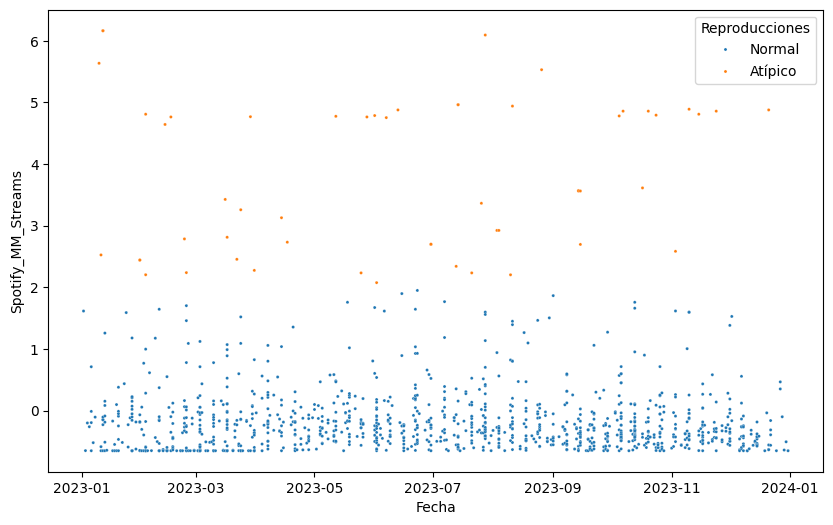

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=datos_z.Fecha, y= datos_z.Spotify_MM_Streams, hue= datos_z['Reproducciones'],s= 5)

Si bien en todos los meses del 2023 hubo datos aislados, estos pueden deberse al lanzamiento de una canción de un artista reconocido. Pasada esa instancia, se normalizan las reproducciones.

In [ ]:
df_original_songs = df_songs[~df_songs['Track'].str.contains('Cover', case=False)]
df_original_songs = df_original_songs[~df_original_songs['Artist'].str.contains('xSyborg', case=False, na=True)]
top_8_songs_df = df_original_songs.groupby('Track')['Spotify_MM_Streams'].sum().sort_values(ascending=False).head(8).reset_index()
top_8_songs_df = top_8_songs_df.merge(df_songs[['Track', 'Artist']], on='Track', how='left').drop_duplicates()
top_8_songs_df = top_8_songs_df[['Artist', 'Track', 'Spotify_MM_Streams']]
top_8_songs_df = top_8_songs_df.drop_duplicates(subset='Track', keep='first')
top_8_songs_df

,Artist,Track,Spotify_MM_Streams
0,Harry Styles,As It Was,6601.37
3,Halsey,Without Me,6336.15
6,Miley Cyrus,Flowers,6333.16
10,The Kid LAROI,STAY (with Justin Bieber),6214.20
12,SZA,Kill Bill,5590.26
15,Hozier,Take Me to Church,5088.98
17,Passenger,Let Her Go,4505.42
19,Arctic Monkeys,Do I Wanna Know?,4377.18


In [ ]:
temp_df = top_8_songs_df.copy()

top_8_songs_df = temp_df[['Track', 'Spotify_MM_Streams']]

num_colors = len(top_8_songs_df['Track'].unique())
from bokeh.palettes import viridis
colors = viridis(num_colors)

top_8_songs_df['color'] = colors

top_8_songs_df = ColumnDataSource(data=top_8_songs_df)

pv = figure(x_range=top_8_songs_df.data['Track'], height=300, width=800, title="Top 8 Canciones")

color_mapper = CategoricalColorMapper(factors=top_8_songs_df.data['Track'], palette=Spectral6)

vbar = pv.vbar(x='Track', top='Spotify_MM_Streams', width=0.7,
             fill_color={'field': 'Track', 'transform': color_mapper},
             source=top_8_songs_df, legend_label="Track")

pv.xgrid.grid_line_color = None
pv.xaxis.axis_label = "Canción"
pv.yaxis.axis_label = "Canciones Top"
pv.legend.orientation = "horizontal"
pv.legend.location = "top_right"
pv.add_tools(HoverTool())

show(pv)

In [ ]:
#Z Score with Bokeh

# Cargar datos
datos_total_B = df_songs[~df_songs['Track'].str.contains('Cover', case=False)]
datos_total_B = df_songs[['Release Date', 'Spotify_MM_Streams', 'Track', 'Artist']]
datos_total_B['Release Date'] = pd.to_datetime(datos_total_B['Release Date'])
datos_B = datos_total_B[datos_total_B['Release Date'].dt.year == 2023]
datos_B = datos_B.rename(columns={'Release Date': 'Fecha'})
datos_B = datos_B.reset_index(drop=True)
datos_B = datos_B.sort_values(by='Fecha')
datos_B

<ipython-input-74-69c55c0c4e6a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_total_B['Release Date'] = pd.to_datetime(datos_total_B['Release Date'])


,Fecha,Spotify_MM_Streams,Track,Artist
166,2023-01-02,675.59,OMG,NewJeans
520,2023-01-03,0.56,Tï¿½ï¿½ï¿½t Bï¿½ï¿½n,Hana Cï¿½ï¿½ï¿½m
189,2023-01-04,134.21,THIS YEAR (Blessings),Victor Thompson
838,2023-01-05,116.04,Memory Lane,Old Dominion
901,2023-01-06,135.98,The Summoning,Sleep Token
...,...,...,...,...
77,2023-12-27,298.85,Praise Jah In The Moonlight,YG Marley
288,2023-12-28,164.22,Rompe La Dompe,Peso Pluma
1134,2023-12-29,3.23,ýýýýýýýýýýýýýýýýýýýýýýýý,ýýýýýýýýýýýýýýýýýýýýýýýý
469,2023-12-30,43.28,Kurchi Madathapetti,Thaman S


In [ ]:
# Convertir a z score
datos_z_B=pd.DataFrame()
for j in datos_B.columns[1:2]:
  datos_z_B[j] = (datos_B[j] - datos_B[j].mean()) / datos_B[j].std()
datos_z_B['Fecha']= datos_B['Fecha']
datos_z_B['Track']= datos_B['Track']
datos_z_B['Artist']= datos_B['Artist']
datos_z_B.head()

,Spotify_MM_Streams,Fecha,Track,Artist
166,1.614281,2023-01-02,OMG,NewJeans
520,-0.650819,2023-01-03,Tï¿½ï¿½ï¿½t Bï¿½ï¿½n,Hana Cï¿½ï¿½ï¿½m
189,-0.202349,2023-01-04,THIS YEAR (Blessings),Victor Thompson
838,-0.263320,2023-01-05,Memory Lane,Old Dominion
901,-0.196410,2023-01-06,The Summoning,Sleep Token


In [ ]:
datos_z_B = datos_z_B.drop_duplicates(subset='Track', keep='first')
datos_z_B['Reproducciones'] = datos_z_B['Spotify_MM_Streams'].apply(lambda x: 'Atípico' if (x>2 or x<-2) else 'Normal')
datos_z_B.head()

<ipython-input-93-c0912e5dd2e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_z_B['Reproducciones'] = datos_z_B['Spotify_MM_Streams'].apply(lambda x: 'Atípico' if (x>2 or x<-2) else 'Normal')


,Spotify_MM_Streams,Fecha,Track,Artist,Reproducciones
166,1.614281,2023-01-02,OMG,NewJeans,Normal
520,-0.650819,2023-01-03,Tï¿½ï¿½ï¿½t Bï¿½ï¿½n,Hana Cï¿½ï¿½ï¿½m,Normal
189,-0.202349,2023-01-04,THIS YEAR (Blessings),Victor Thompson,Normal
838,-0.263320,2023-01-05,Memory Lane,Old Dominion,Normal
901,-0.196410,2023-01-06,The Summoning,Sleep Token,Normal


In [ ]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, CategoricalColorMapper
from bokeh.transform import factor_cmap
from bokeh.palettes import Category10
import pandas as pd

datos_z_B['Fecha'] = pd.to_datetime(datos_z_B['Fecha'])
datos_z_B = datos_z_B.sort_values(by='Fecha')

source = ColumnDataSource(data=dict(
    x=datos_z_B['Fecha'],
    y=datos_z_B['Spotify_MM_Streams'],
    label=datos_z_B['Track'],
    reproducciones=datos_z_B['Reproducciones']
))

bsp = figure(width=900, height=500,
           x_axis_label='Fecha',
           y_axis_label='Reproducciones',
           title='Reproducciones 2023',
           x_axis_type='datetime')

# Create a color mapper
color_mapper = factor_cmap('reproducciones', palette=Category10[3],
                           factors=datos_z_B['Reproducciones'].unique())

bsp.circle(x='x', y='y', source=source, size=5,
         fill_color=color_mapper, fill_alpha=0.6)

hover = HoverTool()
hover.tooltips = [
    ("Song", "@label"),
    ("X", "@x"),
    ("Y", "@y")
]

bsp.add_tools(hover)

#output_notebook()
show(bsp)

In [ ]:
atipicos_df = datos_z_B[datos_z_B['Reproducciones']=='Atípico']
atipicos_df

,Spotify_MM_Streams,Fecha,Track,Artist,Reproducciones
1102,5.634772,2023-01-10,Kill Bill,SZA,Atípico
19,2.524810,2023-01-11,"Shakira: Bzrp Music Sessions, Vol. 53",Bizarrap,Atípico
0,6.163373,2023-01-12,Flowers,Miley Cyrus,Atípico
178,2.441156,2023-01-31,Last Night,Morgan Wallen,Atípico
405,4.808232,2023-02-03,Danza Kuduro - Cover,MUSIC LAB JPN,Atípico
31,2.203181,2023-02-03,Boy's a Liar Pt. 2,PinkPantheress,Atípico
987,4.642031,2023-02-13,IDGAF,Lucixn,Atípico
891,4.763838,2023-02-16,Cake By The Ocean - Cover,epi records,Atípico
23,2.784665,2023-02-23,TQG,KAROL G,Atípico
72,2.237743,2023-02-24,Cupid - Twin Ver.,FIFTY FIFTY,Atípico


In [ ]:
atipicos_df.shape[0]

32

In [ ]:
#Relación reproducciones atípicas con artistas reconocidos

top_100_artists = df_songs['Artist'].value_counts().head(100)
top_100_artists

Artist
Drake             63
Taylor Swift      63
Bad Bunny         60
KAROL G           32
The Weeknd        31
                  ..
Burna Boy          8
Camila Cabello     8
Shubh              8
Kygo               8
ROSALï¿½           8
Name: count, Length: 100, dtype: int64

In [ ]:
atipicos_artists = atipicos_df['Artist'].unique()
atipicos_artists = [artist for artist in atipicos_artists if artist in top_100_artists]
for artist in atipicos_artists:
    outlier_tracks = atipicos_df[atipicos_df['Artist'] == artist]['Track'].tolist()
atipicos_artists = atipicos_df[atipicos_df['Artist'].isin(atipicos_artists)][['Track', 'Artist', 'Spotify_MM_Streams']]
atipicos_artists = atipicos_artists.sort_values('Spotify_MM_Streams', ascending=False)
atipicos_artists = atipicos_artists.drop_duplicates(subset='Track', keep='first')
atipicos_artists

,Track,Artist,Spotify_MM_Streams
0,Flowers,Miley Cyrus,6.163373
1102,Kill Bill,SZA,5.634772
50,Seven (feat. Latto) (Explicit Ver.),Jung Kook,4.963024
110,Seven (feat. Latto) (Clean Ver.),Jung Kook,4.963024
405,Danza Kuduro - Cover,MUSIC LAB JPN,4.808232
943,Paint The Town Red,Doja Cat,2.922309
23,TQG,KAROL G,2.784665
21,un x100to,Grupo Frontera,2.731378
47,vampire,Olivia Rodrigo,2.699366
19,"Shakira: Bzrp Music Sessions, Vol. 53",Bizarrap,2.524810


In [ ]:
#De las 32 reproducciones atípicas, ¿cuántas son de artistas reconocidos?

atipicos_artists.shape[0]

18

El 56% de las reproducciones atípicas se deben a que fueron promovidas por artistas extremadamente famosos y talentosos como ser Miley Cyrus, Bizarrap, Dua Lipa, etc.